In [8]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.learning_curve import validation_curve
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Read Data 

In [7]:
data = pd.read_csv("data/driver_image.csv")
data = data.ix[:,1:]
X_data = data.ix[:,:-1]
y_data = data.ix[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.25)

### Naive Bayes Gaussain

In [33]:
from sklearn.naive_bayes import GaussianNB

In [34]:
%%time
gaussian_nb = GaussianNB().fit(X_train, y_train)

Wall time: 3.19 s


In [35]:
%%time
gaussian_predict = gaussian_nb.predict(X_test)

Wall time: 4.19 s


In [36]:
print(classification_report(y_test, gaussian_predict))

             precision    recall  f1-score   support

        0.0       0.42      0.54      0.47       606
        1.0       0.59      0.34      0.43       563
        2.0       0.34      0.54      0.41       581
        3.0       0.58      0.44      0.50       571
        4.0       0.60      0.43      0.50       571
        5.0       0.39      0.53      0.45       575
        6.0       0.53      0.47      0.50       587
        7.0       0.38      0.51      0.44       497
        8.0       0.46      0.27      0.34       505
        9.0       0.43      0.37      0.39       550

avg / total       0.47      0.44      0.44      5606



In [17]:
confusion_matrix(y_test, gaussian_predict)

array([[326,  13,  56,  48,  48,  36,   7,  10,  10,  75],
       [ 77, 204,  52,  21,   7,  39,  70,  56,  23,  33],
       [ 38,  13, 321,   4,   1,  76,  51,  66,  35,   6],
       [ 96,  12,  52, 260,  35,  48,   0,  19,   7,  35],
       [104,  18,  48,  48, 231,  43,   3,  17,   8,  50],
       [ 34,  17,  70,   4,   6, 332,  35,  25,  13,  42],
       [ 31,  12,  86,   0,   7,  74, 288,  39,  28,  13],
       [ 13,   3,  83,  11,   7,  33,  22, 262,  44,  17],
       [ 39,   6,  86,   6,  15,  38,  57,  65, 114,  23],
       [ 89,  23,  48,  41,   5,  45,   2,  70,  29, 198]])

In [56]:
sum(y_test != gaussian_predict)

3113

### Naive Bayes QDA 

In [58]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

In [59]:
%%time
qda = QuadraticDiscriminantAnalysis().fit(X_train, y_train)

C:\Users\kms\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:688: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Wall time: 47.8 s


In [60]:
%%time
qda_predict = qda.predict(X_test)

Wall time: 13.1 s


In [61]:
print(classification_report(y_test, qda_predict))

             precision    recall  f1-score   support

        0.0       0.35      0.32      0.33       606
        1.0       0.33      0.31      0.32       563
        2.0       0.32      0.27      0.29       581
        3.0       0.30      0.28      0.29       571
        4.0       0.33      0.30      0.31       571
        5.0       0.32      0.29      0.30       575
        6.0       0.30      0.27      0.28       587
        7.0       0.18      0.29      0.22       497
        8.0       0.17      0.22      0.19       505
        9.0       0.29      0.26      0.27       550

avg / total       0.29      0.28      0.28      5606



In [62]:
confusion_matrix(y_test, qda_predict)

array([[191,  29,  44,  59,  43,  43,  36,  65,  57,  39],
       [ 47, 174,  43,  40,  32,  26,  51,  60,  54,  36],
       [ 39,  32, 158,  41,  39,  40,  50,  83,  62,  37],
       [ 47,  34,  36, 160,  55,  50,  37,  54,  54,  44],
       [ 37,  46,  29,  34, 172,  37,  42,  68,  70,  36],
       [ 37,  29,  39,  40,  44, 164,  48,  66,  61,  47],
       [ 42,  31,  49,  48,  28,  33, 158,  85,  75,  38],
       [ 32,  38,  38,  38,  25,  37,  43, 144,  61,  41],
       [ 34,  60,  23,  43,  32,  41,  39,  90, 111,  32],
       [ 43,  49,  37,  24,  55,  47,  27,  74,  53, 141]])

In [63]:
sum(y_test != qda_predict)

4033

### Naive Bayes LDA

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [5]:
%%time
lda = LinearDiscriminantAnalysis(n_components=3).fit(X_train, y_train)

Wall time: 3min 2s


In [19]:
%%time
lda_predict = lda.predict(X_test)

Wall time: 85.6 ms


In [20]:
print(classification_report(y_test, lda_predict))

             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       629
        1.0       1.00      0.99      0.99       582
        2.0       0.99      0.99      0.99       611
        3.0       0.99      0.98      0.98       564
        4.0       0.98      0.98      0.98       570
        5.0       0.99      0.99      0.99       578
        6.0       0.98      0.99      0.98       578
        7.0       0.99      0.98      0.98       495
        8.0       0.96      0.97      0.97       449
        9.0       0.99      0.96      0.97       550

avg / total       0.98      0.98      0.98      5606



In [21]:
confusion_matrix(y_test, lda_predict)

array([[621,   1,   2,   2,   1,   0,   0,   1,   0,   1],
       [  0, 577,   3,   0,   0,   0,   0,   1,   0,   1],
       [  0,   0, 605,   0,   0,   0,   4,   1,   0,   1],
       [  2,   1,   0, 554,   7,   0,   0,   0,   0,   0],
       [  3,   0,   1,   3, 561,   0,   1,   0,   1,   0],
       [  2,   0,   0,   0,   0, 574,   0,   1,   1,   0],
       [  3,   0,   1,   0,   1,   2, 570,   0,   1,   0],
       [  2,   0,   0,   1,   1,   0,   3, 483,   5,   0],
       [  3,   0,   1,   0,   1,   0,   1,   1, 437,   5],
       [  2,   0,   0,   1,   1,   4,   2,   1,  10, 529]])

In [55]:
sum(y_test != lda_predict)

NameError: name 'lda_predict' is not defined

### Decision Tree Parameter Optimized

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
max_depth_range = np.arange(1,102, 20)

In [11]:
%%time
train_score, test_score = validation_curve(DecisionTreeClassifier(), data.ix[:,:-1], data.ix[:,-1],
                          param_name = "max_depth", param_range=max_depth_range,scoring="accuracy", n_jobs=4)

Wall time: 5min 26s


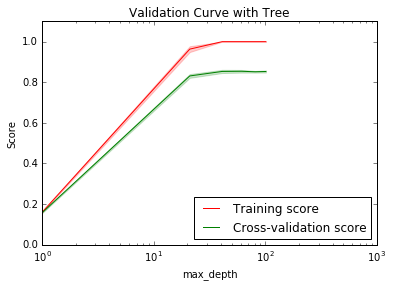

In [12]:
train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.title("Validation Curve with Tree")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(max_depth_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(max_depth_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(max_depth_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

### Decision Tree

In [37]:
%%time
tree = DecisionTreeClassifier(max_depth=60).fit(X_train, y_train)

Wall time: 1min 10s


In [38]:
%%time
tree_predict = tree.predict(X_test)

Wall time: 151 ms


In [39]:
print(classification_report(y_test, tree_predict))

             precision    recall  f1-score   support

        0.0       0.85      0.85      0.85       606
        1.0       0.92      0.90      0.91       563
        2.0       0.86      0.87      0.87       581
        3.0       0.87      0.91      0.89       571
        4.0       0.87      0.88      0.88       571
        5.0       0.90      0.89      0.90       575
        6.0       0.85      0.89      0.87       587
        7.0       0.86      0.85      0.86       497
        8.0       0.82      0.75      0.78       505
        9.0       0.85      0.85      0.85       550

avg / total       0.87      0.87      0.87      5606



In [40]:
confusion_matrix(y_test, tree_predict)

array([[514,   6,  11,  15,  14,   7,   5,   5,  17,  12],
       [  5, 509,  10,   2,   3,   3,  11,   4,   8,   8],
       [  6,   9, 508,   4,   5,  12,  12,  11,   6,   8],
       [ 11,   1,   7, 518,  13,   3,   6,   4,   4,   4],
       [ 10,   2,   8,  20, 502,   4,   3,   4,   7,  11],
       [  5,   3,   9,   8,   5, 511,  13,   6,   9,   6],
       [  4,   5,  14,   5,   3,   7, 521,  13,  12,   3],
       [ 12,   5,  12,   4,   6,   5,  13, 423,   9,   8],
       [ 16,   8,  11,  10,  18,   8,  16,  14, 380,  24],
       [ 20,   3,   3,  11,   7,   6,  11,   8,  14, 467]])

In [54]:
sum(y_test != tree_predict)

753

### Decision Tree (entropy)

In [45]:
%%time
tree_e = DecisionTreeClassifier(criterion="entropy", max_depth=60).fit(X_train, y_train)

Wall time: 1min 39s


In [42]:
%%time
tree_e_predict = tree.predict(X_test)

Wall time: 163 ms


In [43]:
print(classification_report(y_test, tree_e_predict))

             precision    recall  f1-score   support

        0.0       0.85      0.85      0.85       606
        1.0       0.92      0.90      0.91       563
        2.0       0.86      0.87      0.87       581
        3.0       0.87      0.91      0.89       571
        4.0       0.87      0.88      0.88       571
        5.0       0.90      0.89      0.90       575
        6.0       0.85      0.89      0.87       587
        7.0       0.86      0.85      0.86       497
        8.0       0.82      0.75      0.78       505
        9.0       0.85      0.85      0.85       550

avg / total       0.87      0.87      0.87      5606



In [44]:
confusion_matrix(y_test, tree_e_predict)

array([[514,   6,  11,  15,  14,   7,   5,   5,  17,  12],
       [  5, 509,  10,   2,   3,   3,  11,   4,   8,   8],
       [  6,   9, 508,   4,   5,  12,  12,  11,   6,   8],
       [ 11,   1,   7, 518,  13,   3,   6,   4,   4,   4],
       [ 10,   2,   8,  20, 502,   4,   3,   4,   7,  11],
       [  5,   3,   9,   8,   5, 511,  13,   6,   9,   6],
       [  4,   5,  14,   5,   3,   7, 521,  13,  12,   3],
       [ 12,   5,  12,   4,   6,   5,  13, 423,   9,   8],
       [ 16,   8,  11,  10,  18,   8,  16,  14, 380,  24],
       [ 20,   3,   3,  11,   7,   6,  11,   8,  14, 467]])

In [53]:
sum(y_test != tree_e_predict)

753

In [27]:
from io import StringIO
from pydot import pydot
from sklearn.tree import export_graphviz
from IPython.display import Image

dot_buf = StringIO() 
export_graphviz(tree, out_file=dot_buf, feature_names=["X"+str(i) for i in range(5600)])
graph = pydot.graph_from_dot_data(dot_buf.getvalue()) 
image = graph.create_png()
image_buf = StringIO() 
image_buf.write(image)
Image(image_buf.getvalue())

Couldn't import dot_parser, loading of dot files will not be possible.


NameError: name 'dot_parser' is not defined

### Random Forest Parameter Optimized

In [7]:
max_depth_range = np.arange(1,101)

In [8]:
%%time
train_score, test_score = validation_curve(RandomForestClassifier(), data.ix[:,:-1], data.ix[:,-1],
                          param_name = "max_depth", param_range=max_depth_range,scoring="accuracy", n_jobs=4)

Wall time: 17min 51s


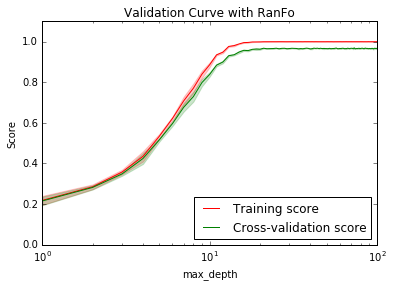

In [12]:
train_scores_mean = np.mean(train_score, axis=1)
train_scores_std = np.std(train_score, axis=1)
test_scores_mean = np.mean(test_score, axis=1)
test_scores_std = np.std(test_score, axis=1)

plt.title("Validation Curve with RanFo")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(max_depth_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(max_depth_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(max_depth_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(max_depth_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

In [4]:
n_estimators_range = np.arange(1,201,10)

In [5]:
%%time
train_score2, test_score2 = validation_curve(RandomForestClassifier(), data.ix[:,:-1], data.ix[:,-1],
                          param_name = "n_estimators", param_range=n_estimators_range, scoring="accuracy", n_jobs=4)

Wall time: 18min 18s


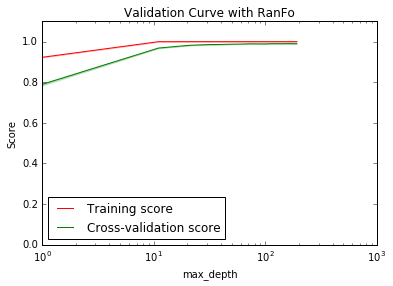

In [6]:
train_scores_mean = np.mean(train_score2, axis=1)
train_scores_std = np.std(train_score2, axis=1)
test_scores_mean = np.mean(test_score2, axis=1)
test_scores_std = np.std(test_score2, axis=1)

plt.title("Validation Curve with RanFo")
plt.xlabel("max_depth")
plt.ylabel("Score")
plt.ylim(0.0, 1.1)
plt.semilogx(n_estimators_range, train_scores_mean, label="Training score", color="r")
plt.fill_between(n_estimators_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2, color="r")
plt.semilogx(n_estimators_range, test_scores_mean, label="Cross-validation score", color="g")
plt.fill_between(n_estimators_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2, color="g")
plt.legend(loc="best")
plt.show()

### Random Forest

In [50]:
%%time
optimized_random_forest = RandomForestClassifier(max_depth=60, n_estimators=160).fit(X_train, y_train)

Wall time: 1min 48s


In [51]:
%%time
orf_predict = optimized_random_forest.predict(X_test)

Wall time: 620 ms


In [48]:
print(classification_report(y_test, orf_predict))

             precision    recall  f1-score   support

        0.0       0.98      0.99      0.98       606
        1.0       0.99      1.00      0.99       563
        2.0       1.00      0.99      1.00       581
        3.0       0.99      0.99      0.99       571
        4.0       0.99      0.99      0.99       571
        5.0       0.99      0.99      0.99       575
        6.0       1.00      1.00      1.00       587
        7.0       0.98      1.00      0.99       497
        8.0       0.99      0.96      0.97       505
        9.0       0.99      0.97      0.98       550

avg / total       0.99      0.99      0.99      5606



In [49]:
confusion_matrix(y_test, orf_predict)

array([[601,   1,   0,   1,   1,   1,   0,   0,   0,   1],
       [  0, 561,   0,   0,   0,   0,   0,   0,   0,   2],
       [  0,   2, 577,   0,   0,   0,   0,   2,   0,   0],
       [  1,   2,   0, 567,   1,   0,   0,   0,   0,   0],
       [  1,   1,   0,   1, 567,   0,   1,   0,   0,   0],
       [  2,   0,   0,   0,   2, 568,   1,   2,   0,   0],
       [  0,   0,   1,   0,   0,   0, 586,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 497,   0,   0],
       [  5,   1,   0,   5,   3,   0,   0,   3, 483,   5],
       [  5,   0,   0,   1,   0,   4,   0,   1,   6, 533]])

In [52]:
sum(y_test != orf_predict)

64

### Make Kaggle Submission 

In [64]:
%%time
optimized_random_forest = RandomForestClassifier(max_depth=60, n_estimators=160, n_jobs=4).fit(X_data, y_data)

Wall time: 42.9 s


In [65]:
test_data = pd.read_csv("data/test_img_data.csv")

In [68]:
%%time
predict = optimized_random_forest.predict_log_proba(test_data.ix[:,1:])

Wall time: 43.2 s


In [69]:
submission = pd.DataFrame(np.hstack([np.array(test_data.ix[:,0])[:,np.newaxis], predict]), columns=["img"]+["c"+str(i) for i in range(10)])

In [70]:
submission.to_csv("submission/random_forest_log_submission.csv", index=False)

In [ ]:
# to use random_forest score 2.30259

In [7]:
data

,X0,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X5591,X5592,X5593,X5594,X5595,X5596,X5597,X5598,X5599,Y
0,67.0,73.0,88.0,111.0,101.0,154.0,212.0,201.0,204.0,207.0,...,134.0,134.0,133.0,133.0,133.0,132.0,132.0,133.0,133.0,0.0
1,155.0,153.0,145.0,147.0,146.0,136.0,141.0,142.0,156.0,139.0,...,215.0,217.0,219.0,222.0,225.0,227.0,233.0,234.0,231.0,0.0
2,152.0,142.0,128.0,111.0,96.0,70.0,66.0,46.0,39.0,23.0,...,210.0,209.0,212.0,213.0,216.0,218.0,223.0,227.0,228.0,0.0
3,250.0,250.0,249.0,247.0,247.0,243.0,240.0,236.0,231.0,224.0,...,243.0,245.0,243.0,241.0,244.0,244.0,245.0,246.0,246.0,0.0
4,191.0,194.0,199.0,206.0,209.0,237.0,251.0,250.0,251.0,251.0,...,156.0,157.0,159.0,163.0,167.0,167.0,172.0,176.0,177.0,0.0
5,243.0,255.0,194.0,108.0,56.0,29.0,45.0,50.0,57.0,37.0,...,238.0,236.0,239.0,242.0,242.0,245.0,245.0,245.0,242.0,0.0
6,245.0,255.0,139.0,8.0,8.0,2.0,3.0,3.0,3.0,7.0,...,205.0,195.0,189.0,179.0,167.0,161.0,160.0,167.0,176.0,0.0
7,150.0,148.0,145.0,150.0,136.0,120.0,136.0,176.0,184.0,168.0,...,210.0,207.0,207.0,206.0,203.0,211.0,227.0,208.0,215.0,0.0
8,207.0,208.0,212.0,213.0,205.0,197.0,193.0,187.0,186.0,189.0,...,161.0,156.0,150.0,146.0,144.0,142.0,140.0,139.0,140.0,0.0
9,153.0,104.0,98.0,75.0,72.0,71.0,65.0,63.0,52.0,31.0,...,210.0,212.0,212.0,214.0,218.0,223.0,227.0,229.0,228.0,0.0
